In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as color
import seaborn as sns

In [36]:
df=pd.read_csv(r'C:\Users\mostafa\AI&ML\Full-Projects\Weather-Analysis\Weather.csv')
xp = pd.read_csv(r'C:\Users\mostafa\AI&ML\Full-Projects\Weather-Analysis\column_descriptions.txt', delimiter='\t')
xp_2 = pd.read_csv(r'C:\Users\mostafa\AI&ML\Full-Projects\Weather-Analysis\complete_data.txt', delimiter='\t')


In [37]:
xp

,Column Name,Description
0,MinTemp,Minimum temperature of the day (°C)
1,MaxTemp,Maximum temperature of the day (°C)
2,Rainfall,Amount of rainfall recorded (mm)
3,Evaporation,Amount of evaporation (mm)
4,Sunshine,Hours of sunshine in a day
5,WindGustDir,Direction of the strongest wind gust
6,WindGustSpeed,Speed of the strongest wind gust (km/h)
7,WindDir9am,Wind direction at 9 AM
8,WindDir3pm,Wind direction at 3 PM
9,WindSpeed9am,Wind speed at 9 AM (km/h)


In [38]:
# xp_2.drop('Unnamed: 1',axis=1,inplace=True)
# xp_2
# Set pandas to display the full content in cells
pd.set_option('display.max_colwidth', None)  # This shows full text in columns
pd.set_option('display.max_rows', None)      # This will display all rows
pd.set_option('display.max_columns', None)   # This will display all columns

# Now when you display the DataFrame, it won't truncate text or limit rows/columns
xp_2


,Column Name,Unnamed: 1
0,Possible Relationships Between Columns:,NaN
1,Relationship,NaN
2,"Temperature (MinTemp, MaxTemp, Temp9am, Temp3pm): These temperature variables",NaN
3,are likely to correlate with each other.,NaN
4,"Rainfall, RainToday, RainTomorrow: Higher rainfall today could increase the likelihood of rain tomorrow.",NaN
5,"WindGustSpeed, WindSpeed9am, WindSpeed3pm: A strong gust might indicate higher average wind speeds during the day.",NaN
6,"Humidity9am, Humidity3pm: Humidity often correlates with lower temperatures and more cloud cover.",NaN
7,"Cloud9am, Cloud3pm, Sunshine: Cloud cover and sunshine are inversely related.",NaN
8,"Pressure9am, Pressure3pm: Atmospheric pressure changes throughout the day could help predict weather patterns.",NaN
9,"RISK_MM: Predicted rainfall for tomorrow could be linked to today’s rainfall, humidity, cloud cover, and pressure.",NaN


In [39]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,"1,019.7","1,015",7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,"1,012.4","1,008.4",5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,"1,009.5","1,007.2",8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,"1,005.5","1,007",2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,"1,018.3","1,018.5",7,7,11.1,15.4,Yes,0.0,No


In [40]:
all_colors = color.colors.CSS4_COLORS

# Print the color names and their hex codes
for color_name, color_code in all_colors.items():
    print(f"{color_code}",end=' /     ')

#F0F8FF /     #FAEBD7 /     #00FFFF /     #7FFFD4 /     #F0FFFF /     #F5F5DC /     #FFE4C4 /     #000000 /     #FFEBCD /     #0000FF /     #8A2BE2 /     #A52A2A /     #DEB887 /     #5F9EA0 /     #7FFF00 /     #D2691E /     #FF7F50 /     #6495ED /     #FFF8DC /     #DC143C /     #00FFFF /     #00008B /     #008B8B /     #B8860B /     #A9A9A9 /     #006400 /     #A9A9A9 /     #BDB76B /     #8B008B /     #556B2F /     #FF8C00 /     #9932CC /     #8B0000 /     #E9967A /     #8FBC8F /     #483D8B /     #2F4F4F /     #2F4F4F /     #00CED1 /     #9400D3 /     #FF1493 /     #00BFFF /     #696969 /     #696969 /     #1E90FF /     #B22222 /     #FFFAF0 /     #228B22 /     #FF00FF /     #DCDCDC /     #F8F8FF /     #FFD700 /     #DAA520 /     #808080 /     #008000 /     #ADFF2F /     #808080 /     #F0FFF0 /     #FF69B4 /     #CD5C5C /     #4B0082 /     #FFFFF0 /     #F0E68C /     #E6E6FA /     #FFF0F5 /     #7CFC00 /     #FFFACD /     #ADD8E6 /     #F08080 /     #E0FFFF /     #FAFAD2 /     #D3D3D

In [41]:
df.shape

(366, 22)

In [42]:
df.size

8052

In [43]:
df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,"1,016.1","1,010.8",1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,"1,020","1,016.9",0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,"1,024","1,022.8",3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,"1,021","1,016.2",6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,35,43,13,"1,009.6","1,009.2",1,1,23.8,28.6,No,0.0,No


In [44]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

<Axes: >

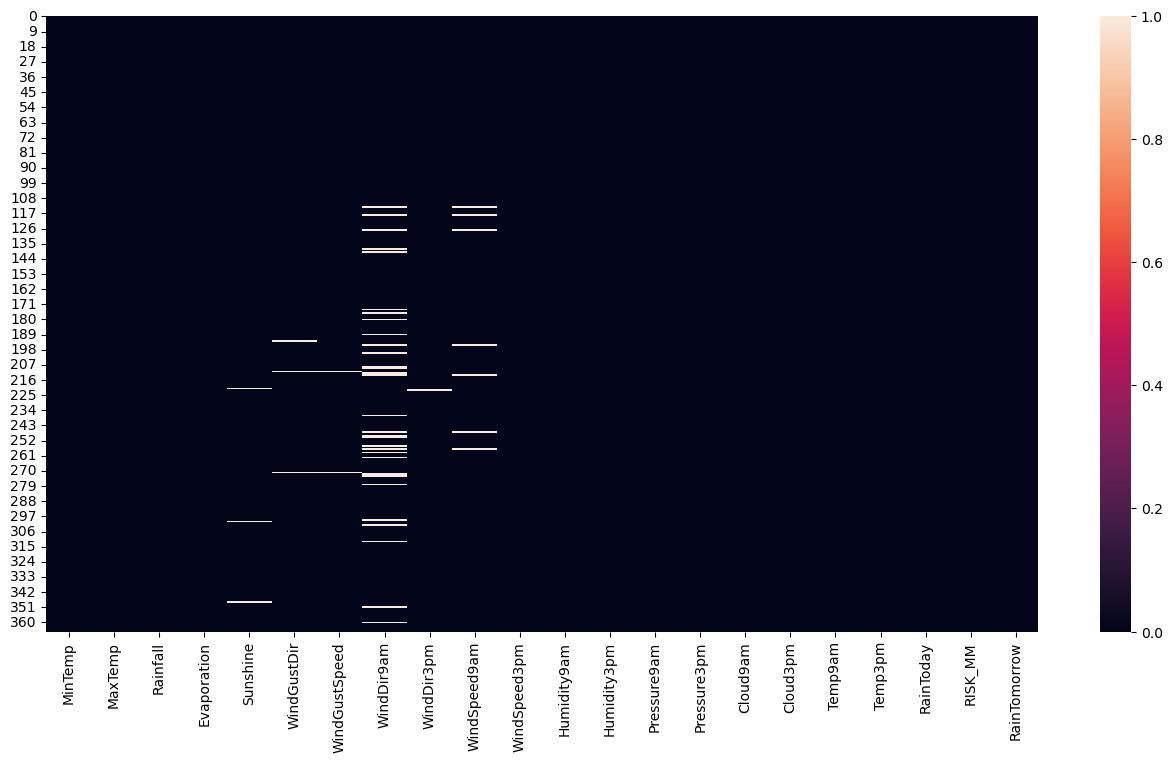

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isna())

In [46]:
df=df.dropna()

In [47]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [49]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,"1,019.7","1,015",7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,"1,012.4","1,008.4",5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,"1,009.5","1,007.2",8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,"1,005.5","1,007",2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,"1,018.3","1,018.5",7,7,11.1,15.4,Yes,0.0,No


In [51]:
df.corr(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.745911,0.197339,0.634720,0.007730,0.190596,0.058319,-0.106321,-0.160781,-0.013897,0.211640,0.125914,0.910805,0.716051,0.251519
MaxTemp,0.745911,1.000000,-0.077263,0.673162,0.444863,0.070911,-0.296485,-0.219886,-0.325106,-0.520412,-0.187416,-0.144976,0.869609,0.988925,0.058638
Rainfall,0.197339,-0.077263,1.000000,-0.011767,-0.158062,0.099442,0.238705,0.058151,0.146321,0.287244,0.172610,0.134894,0.071893,-0.089740,0.101909
Evaporation,0.634720,0.673162,-0.011767,1.000000,0.310124,0.258050,0.006259,0.019594,-0.492218,-0.374532,-0.114261,-0.111387,0.688749,0.655896,0.099727
Sunshine,0.007730,0.444863,-0.158062,0.310124,1.000000,0.084768,-0.103841,0.046140,-0.501596,-0.760267,-0.697603,-0.657198,0.199659,0.463721,-0.357231
WindGustSpeed,0.190596,0.070911,0.099442,0.258050,0.084768,1.000000,0.540717,0.687071,-0.338276,-0.043254,-0.018216,0.042849,0.229164,0.036039,0.269151
WindSpeed9am,0.058319,-0.296485,0.238705,0.006259,-0.103841,0.540717,1.000000,0.495946,-0.222337,0.202122,0.117625,-0.012990,-0.017843,-0.315906,0.053529
WindSpeed3pm,-0.106321,-0.219886,0.058151,0.019594,0.046140,0.687071,0.495946,1.000000,-0.260960,0.015860,-0.033882,0.011625,-0.057454,-0.239119,0.012931
Humidity9am,-0.160781,-0.325106,0.146321,-0.492218,-0.501596,-0.338276,-0.222337,-0.260960,1.000000,0.526695,0.417496,0.289618,-0.395647,-0.321299,0.157148
Humidity3pm,-0.013897,-0.520412,0.287244,-0.374532,-0.760267,-0.043254,0.202122,0.015860,0.526695,1.000000,0.565174,0.530715,-0.230820,-0.569348,0.323494


<Axes: >

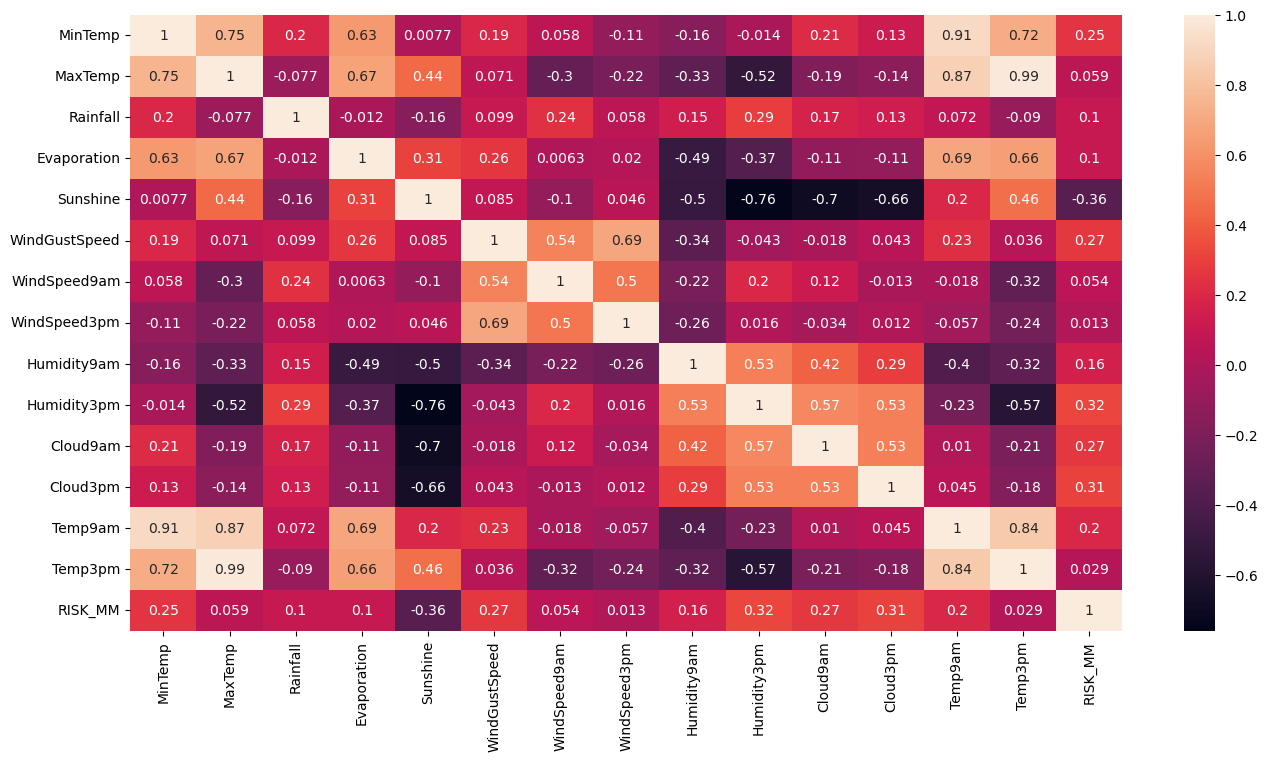

In [52]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Analysis and Visualization

### Add new column for Day

In [27]:
df['Day'] = [['Thurs','Sun','Mon','Fri','Wed','Sat','Tue'][i % 7] for i in range(len(df))]
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Temperature,Humidityam,Pressuree,Cloud_Day
207,4.7,18.5,3.8,2.0,5.1,ESE,22.0,NNW,W,6.0,6,99,50,"1,026.6","1,023.1",7,4,7.0,17.9,Yes,5.2,Yes,Tue,23.2,149,"1,023.11,026.6",11
281,3.1,12.5,1.2,1.4,7.2,N,43.0,WNW,N,6.0,30,69,62,"1,019.8","1,019.1",6,2,7.6,11.3,Yes,0.0,No,Sat,15.6,131,"1,019.11,019.8",8
68,16.5,30.3,0.0,10.0,8.1,E,46.0,E,N,7.0,9,77,44,"1,015.7","1,013.4",7,1,18.1,28.0,No,0.0,No,Sat,46.8,121,"1,013.41,015.7",8
87,13.2,31.3,0.0,6.6,11.6,WSW,46.0,N,WNW,4.0,26,71,28,"1,013.1","1,009.5",1,4,19.7,30.7,No,0.0,No,Fri,44.5,99,"1,009.51,013.1",5
107,11.2,26.1,0.0,7.2,12.6,ENE,39.0,SE,E,7.0,19,71,40,"1,022.9","1,020",1,1,15.3,24.7,No,0.0,No,Mon,37.3,111,"1,0201,022.9",2


In [26]:
df['Temperature']=df['MaxTemp']+df['MinTemp']
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Temperature,Humidityam,Pressuree,Cloud_Day
311,-0.9,16.7,0.0,2.8,8.6,NW,35.0,WNW,NW,7.0,22,84,33,"1,018.1","1,013.9",7,7,6.4,15.5,No,1.0,No,Wed,15.8,117,"1,013.91,018.1",14
131,13.9,34.7,0.0,6.4,8.5,SSW,46.0,SE,ENE,11.0,7,50,18,"1,022.8","1,019.3",0,3,20.2,32.7,No,0.2,No,Mon,48.6,68,"1,019.31,022.8",3
339,10.3,21.3,3.0,4.2,6.7,NNW,43.0,ENE,N,7.0,19,79,46,"1,018.1","1,013.6",8,1,11.7,19.8,Yes,0.0,No,Fri,31.6,125,"1,013.61,018.1",9
321,0.7,14.1,0.0,5.6,9.0,ENE,20.0,SSW,NNW,6.0,7,69,43,"1,026.7","1,022.1",7,1,7.4,13.7,No,0.0,No,Tue,14.8,112,"1,022.11,026.7",8
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,"1,019.7","1,015",7,7,14.4,23.6,No,3.6,Yes,Thurs,32.3,97,"1,0151,019.7",14


In [25]:
df['Humidityam']=df['Humidity9am']+df['Humidity3pm']
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Temperature,Humidityam,Pressuree,Cloud_Day
43,8.9,27.1,0.0,4.4,12.7,E,35.0,NNW,N,6.0,11,63,37,"1,018.1","1,012.5",1,2,15.8,25.0,No,0.0,No,Sun,36.0,100,"1,012.51,018.1",3
246,-3.1,12.0,0.0,1.8,3.9,ESE,35.0,SSW,NE,4.0,13,80,52,"1,030.5","1,030",1,6,5.9,10.2,No,0.0,No,Mon,8.9,132,"1,0301,030.5",7
12,10.1,27.9,0.0,7.2,13.0,WNW,30.0,S,NW,6.0,7,62,29,"1,022","1,017.1",0,1,17.0,27.1,No,0.0,No,Sat,38.0,91,"1,017.11,022",1
357,3.2,18.0,0.0,7.4,12.2,SSE,48.0,SSE,S,26.0,15,47,25,"1,026.6","1,022.8",1,2,9.1,16.3,No,0.0,No,Sat,21.2,72,"1,022.81,026.6",3
124,10.1,28.2,0.0,6.0,7.3,ESE,39.0,SSE,WNW,6.0,7,72,28,"1,021.1","1,018.2",1,7,15.6,27.0,No,0.0,No,Fri,38.3,100,"1,018.21,021.1",8


In [23]:
df['Pressuree']=df['Pressure3pm']+df['Pressure9am']

In [24]:
df['Cloud_Day']=df['Cloud3pm']+df['Cloud9am']
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Temperature,Humidityam,Pressuree,Cloud_Day
220,4.3,14.5,0.0,2.0,3.0,E,30.0,SSE,ENE,6.0,13,76,70,"1,034.3","1,031.7",7,7,7.9,13.0,No,0.0,No,Thurs,18.8,146,"1,031.71,034.3",14
228,6.4,16.9,0.0,2.6,5.9,SSW,26.0,SSW,ESE,17.0,9,78,51,"1,027.8","1,024.8",7,2,9.5,16.0,No,0.0,No,Tue,23.3,129,"1,024.81,027.8",9
22,12.8,18.5,25.8,2.8,0.6,ESE,28.0,S,SE,13.0,13,91,79,"1,014","1,014.9",8,8,14.0,16.8,Yes,0.4,No,Sun,31.3,170,"1,014.91,014",16
296,2.3,11.6,0.0,5.4,9.5,S,54.0,SSW,ESE,30.0,17,49,38,"1,025.9","1,025.5",1,1,6.7,11.1,No,0.0,No,Tue,13.9,87,"1,025.51,025.9",2
281,3.1,12.5,1.2,1.4,7.2,N,43.0,WNW,N,6.0,30,69,62,"1,019.8","1,019.1",6,2,7.6,11.3,Yes,0.0,No,Sat,15.6,131,"1,019.11,019.8",8


## Rain expected in specific Day => the DaY Expcted is Sat

In [27]:
df['Day'] = pd.Categorical(df['Day'], categories=['Sat','Sun','Mon','Tue','Wed','Thurs','Fri'], ordered=True)

Day = df.groupby('Day').sum(numeric_only=True)
Day

C:\Users\mostafa\AppData\Local\Temp\ipykernel_16148\1398884987.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Day = df.groupby('Day').sum(numeric_only=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Temperature,Humidityam,Cloud_Day
Day,,,,,,,,,,,,,,,,,,
Sat,357.6,956.7,86.0,219.8,397.6,2036.0,630.0,921,3195,2113,182,161,591.7,889.8,36.6,1314.3,5308,343
Sun,381.2,1008.9,94.2,202.4,379.7,1839.0,451.0,859,3390,2033,179,197,624.6,955.9,88.0,1390.1,5423,376
Mon,382.2,1016.8,88.4,230.4,369.0,1795.0,408.0,771,3500,2070,181,170,615.5,950.4,104.6,1399.0,5570,351
Tue,323.0,947.3,40.6,208.8,389.7,1842.0,447.0,807,3168,1954,163,175,580.7,886.6,34.8,1270.3,5122,338
Wed,375.2,965.8,25.0,236.4,360.1,2086.0,502.0,948,3329,2113,203,236,603.6,894.3,80.8,1341.0,5442,439
Thurs,320.2,963.6,29.8,215.4,352.5,1742.0,448.0,812,3398,2146,184,180,574.6,899.0,96.0,1283.8,5544,364
Fri,400.3,995.3,108.6,229.2,380.3,1910.0,530.0,847,3341,2004,189,193,612.8,938.5,25.8,1395.6,5345,382


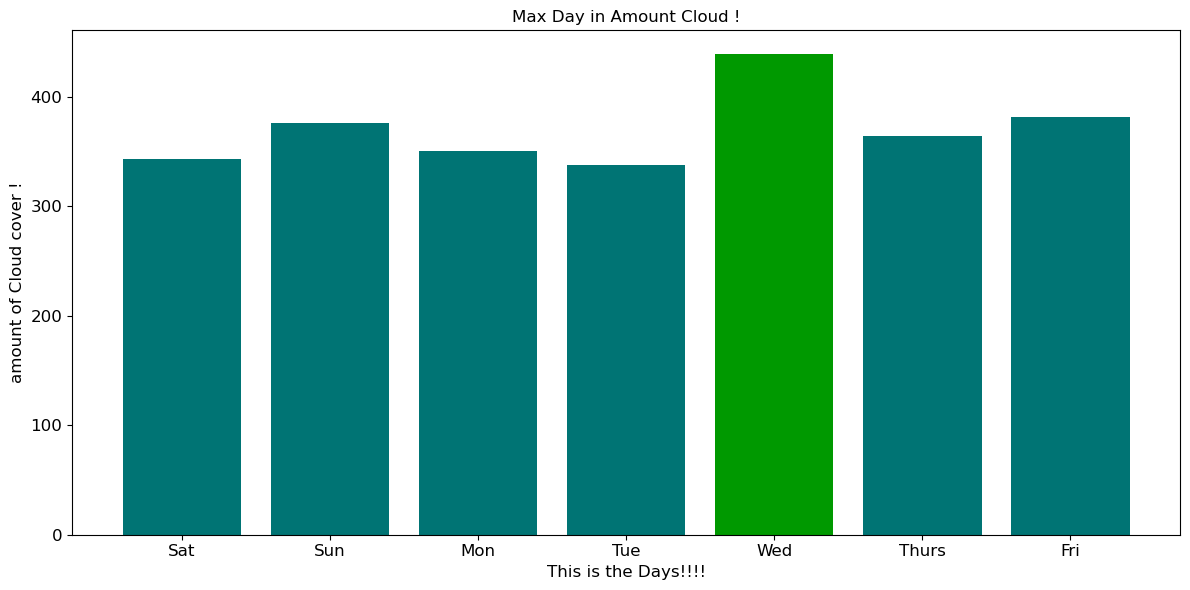

In [28]:
plt.figure(figsize=(12,6))
default_color = '#007474'  
highlight_color = '#009900'  


max_value_day = Day['Cloud_Day'].idxmax()


colors = [highlight_color if day == max_value_day else default_color for day in Day.index]
plt.bar(Day.index,Day['Cloud_Day'],color=colors)
plt.xticks(df['Day'].unique(),color='#000000',size=12)
plt.yticks(color='#000000',size=12)
plt.xlabel('This is the Days!!!!',size=12)
plt.ylabel('amount of Cloud cover !',size=12)
plt.title('Max Day in Amount Cloud !',size=12)

# plt.grid()
plt.tight_layout()


#### Add new Columns for Humidityam amount

Text(0.5, 1.0, 'Max Day in Amount Humidityam !')

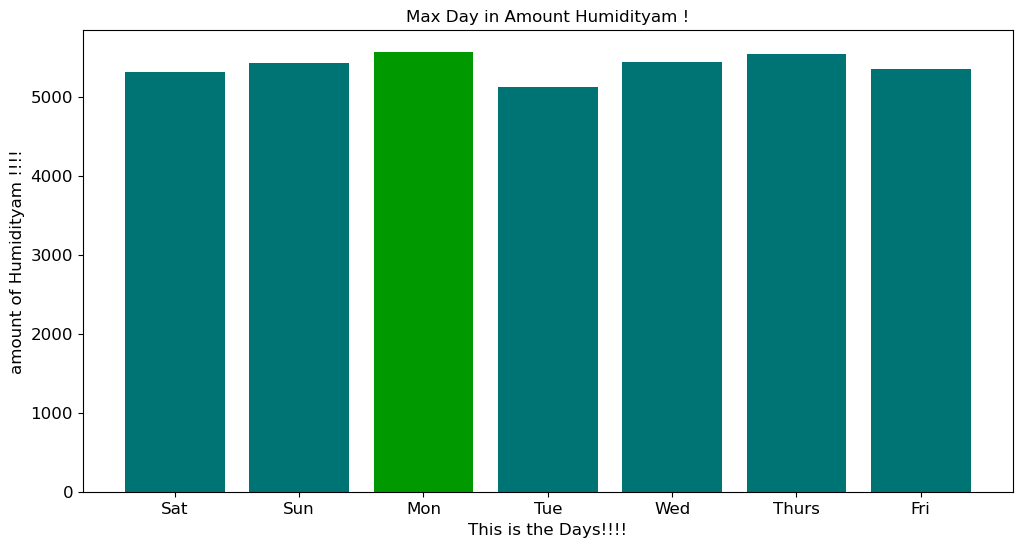

In [29]:
plt.figure(figsize=(12,6))
default_color = '#007474'  
highlight_color = '#009900'  

max_value_day = Day['Humidityam'].idxmax()

colors_2 = [highlight_color if day == max_value_day else default_color for day in Day.index]
Humidityam=plt.bar(Day.index,Day['Humidityam'],color=colors_2)
plt.xticks(df['Day'].unique(),color='#000000',size=12)
plt.yticks(color='#000000',size=12)
plt.xlabel('This is the Days!!!!',size=12)
plt.ylabel('amount of Humidityam !!!!',size=12)
plt.title('Max Day in Amount Humidityam !',size=12)
# plt.grid()

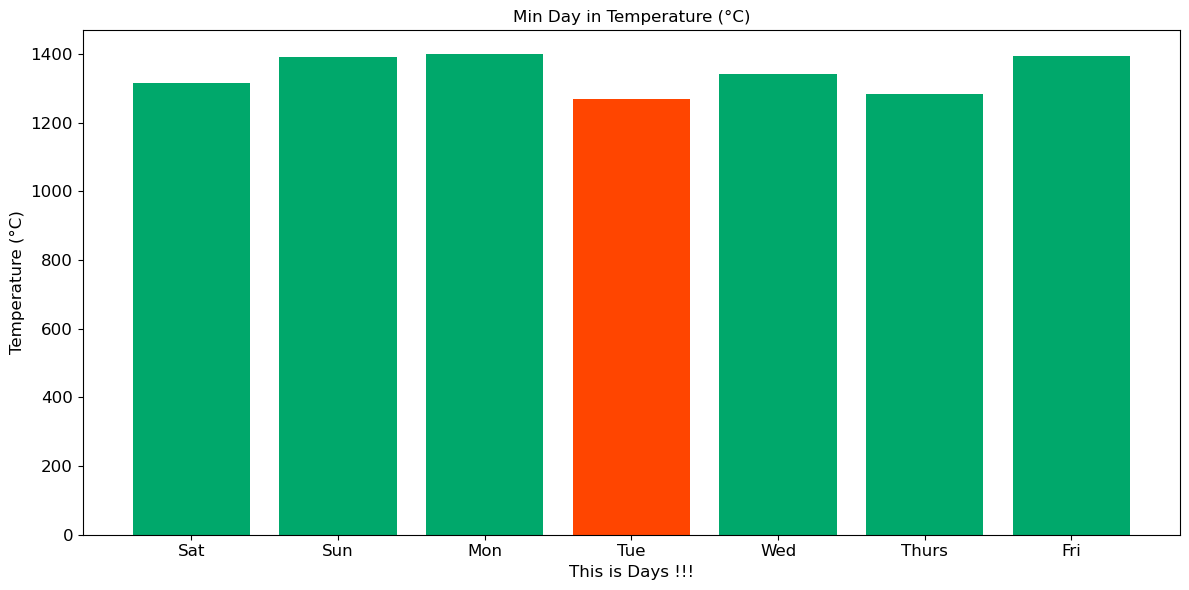

In [30]:
plt.figure(figsize=(12,6))
default_color = '#00a86b'  
highlight_color = '#FF4500'  

max_value_day = Day['Temperature'].idxmin()

colors_3 = [highlight_color if day == max_value_day else default_color for day in Day.index]

plt.bar(Day.index,Day['Temperature'],color=colors_3)
plt.xlabel("This is Days !!!",size=12)
plt.ylabel("Temperature (°C)",size=12)
plt.xticks(df['Day'].unique(),size=12)
plt.yticks(size=12)
plt.title('Min Day in Temperature (°C)',size=12)

plt.tight_layout()
# plt.grid()

Text(0.5, 1.0, 'WindGustSpeed By Day')

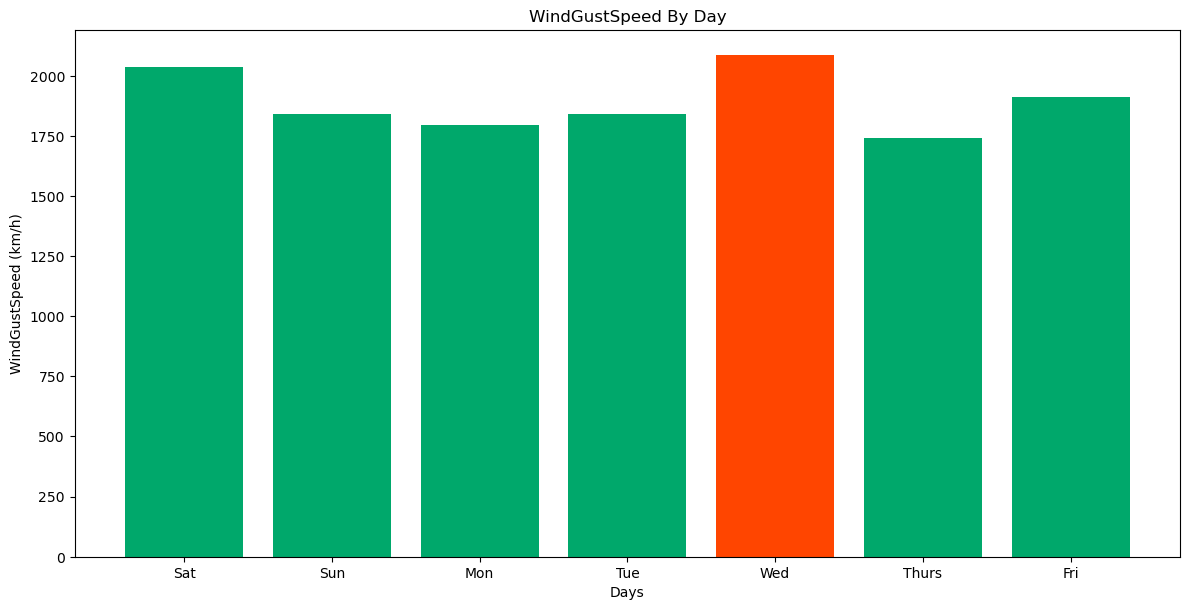

In [31]:
plt.figure(figsize=(12,6))
max_value_day = Day['WindGustSpeed'].idxmax()
colors_4 = [highlight_color if day == max_value_day else default_color for day in Day.index]
plt.bar(Day.index,Day['WindGustSpeed'],color=colors_4)
plt.ylabel('WindGustSpeed (km/h)')
plt.xlabel('Days')
plt.tight_layout()
plt.title('WindGustSpeed By Day')

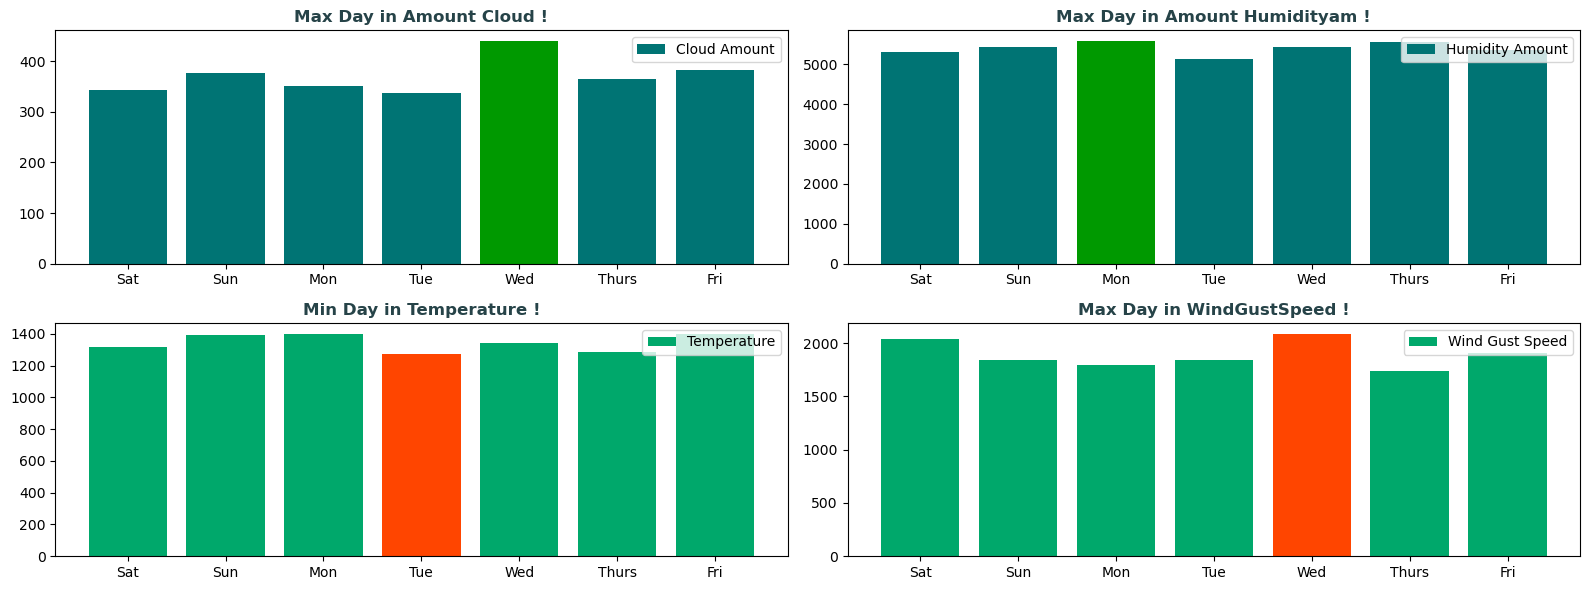

In [32]:
figure,axis=plt.subplots(2,2,figsize=(16,6))
axis[0][0].bar(Day.index,Day['Cloud_Day'],color=colors)
axis[0][0].legend(['Cloud Amount'], loc='upper right')
axis[0][0].set_title('Max Day in Amount Cloud !',size=15, fontsize=12, fontweight='bold', color='#264348')
# axis[0].tick_params(axis='x', rotation=-45)
axis[0][1].bar(Day.index,Day['Humidityam'],color=colors_2)
axis[0][1].legend(['Humidity Amount'], loc='upper right')

axis[0][1].set_title('Max Day in Amount Humidityam !',size=15, fontsize=12, fontweight='bold', color='#264348')
axis[1][0].bar(Day.index,Day['Temperature'],color=colors_3)
axis[1][0].legend(['Temperature'], loc='upper right')

axis[1][0].set_title('Min Day in Temperature !',size=10, fontsize=12, fontweight='bold', color='#264348')
axis[1][1].set_title('Max Day in WindGustSpeed !',size=10, fontsize=12, fontweight='bold', color='#264348')
#color=>
colors_4 = [highlight_color if day == max_value_day else default_color for day in Day.index]
max_value_day = Day['WindGustSpeed'].idxmax()
axis[1][1].bar(Day.index,Day['WindGustSpeed'],color=colors_4)
axis[1][1].legend(['Wind Gust Speed'], loc='upper right')


plt.savefig('D:/1')
plt.tight_layout()


C:\Users\mostafa\AppData\Local\Temp\ipykernel_16148\1192887991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Day_2 = df.groupby(['Day', 'WindGustDir']).sum(numeric_only=True)


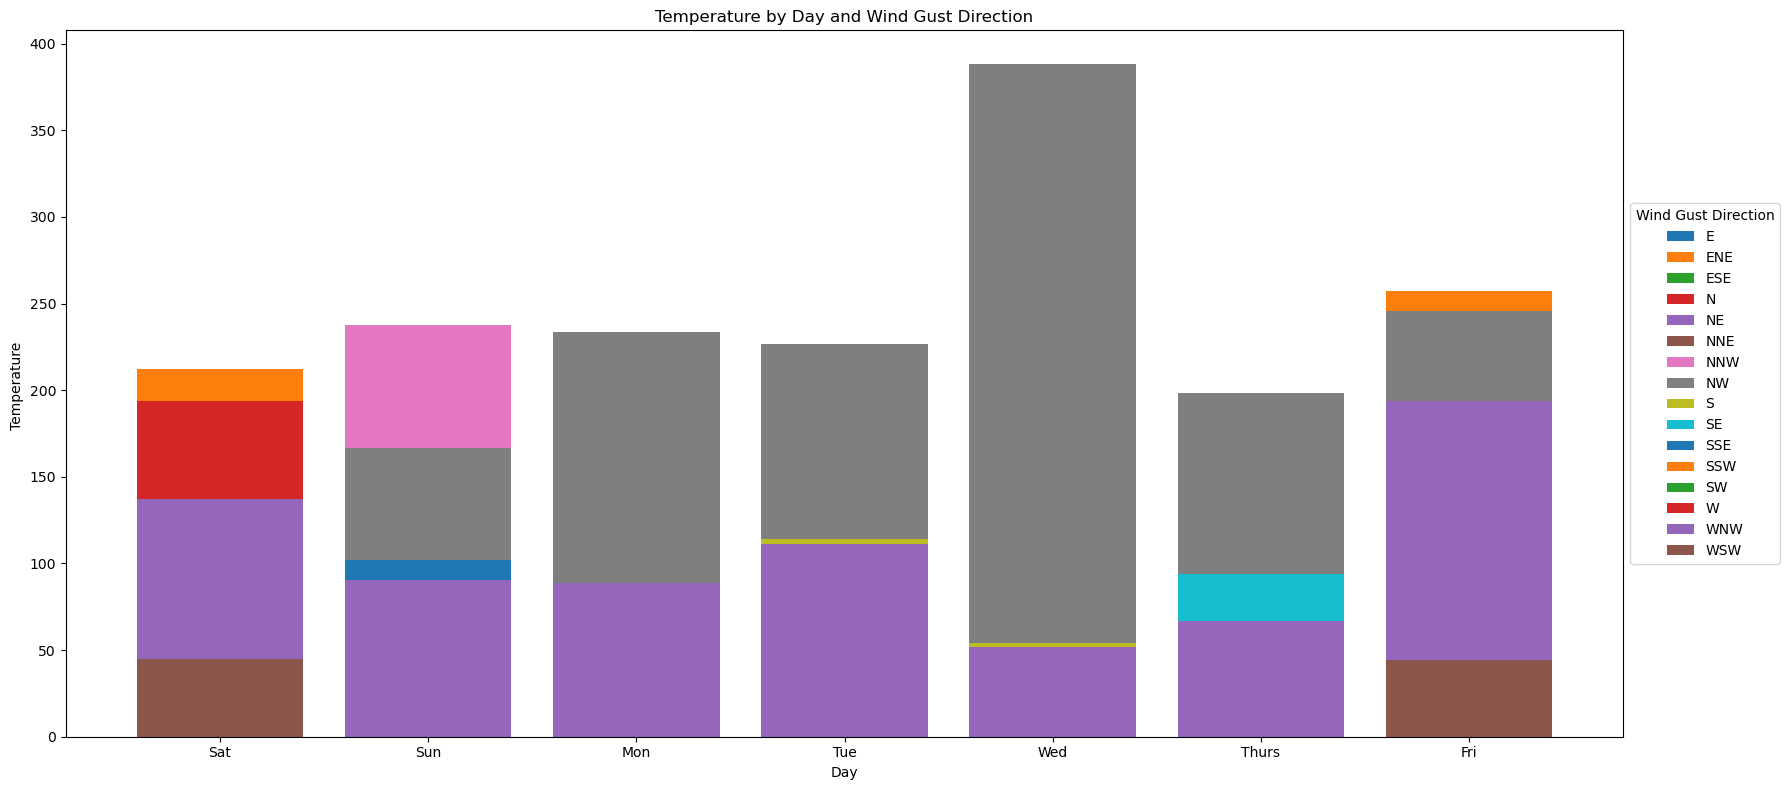

In [33]:
Day_2 = df.groupby(['Day', 'WindGustDir']).sum(numeric_only=True)

Day_2 = Day_2.reset_index()

plt.figure(figsize=(18, 8))
for direction in Day_2['WindGustDir'].unique():
    subset = Day_2[Day_2['WindGustDir'] == direction]
    plt.bar(subset['Day'], subset['Temperature'], label=direction)

plt.xlabel('Day')
plt.ylabel('Temperature ')
plt.title('Temperature by Day and Wind Gust Direction')
plt.legend(title='Wind Gust Direction', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('D:/2')

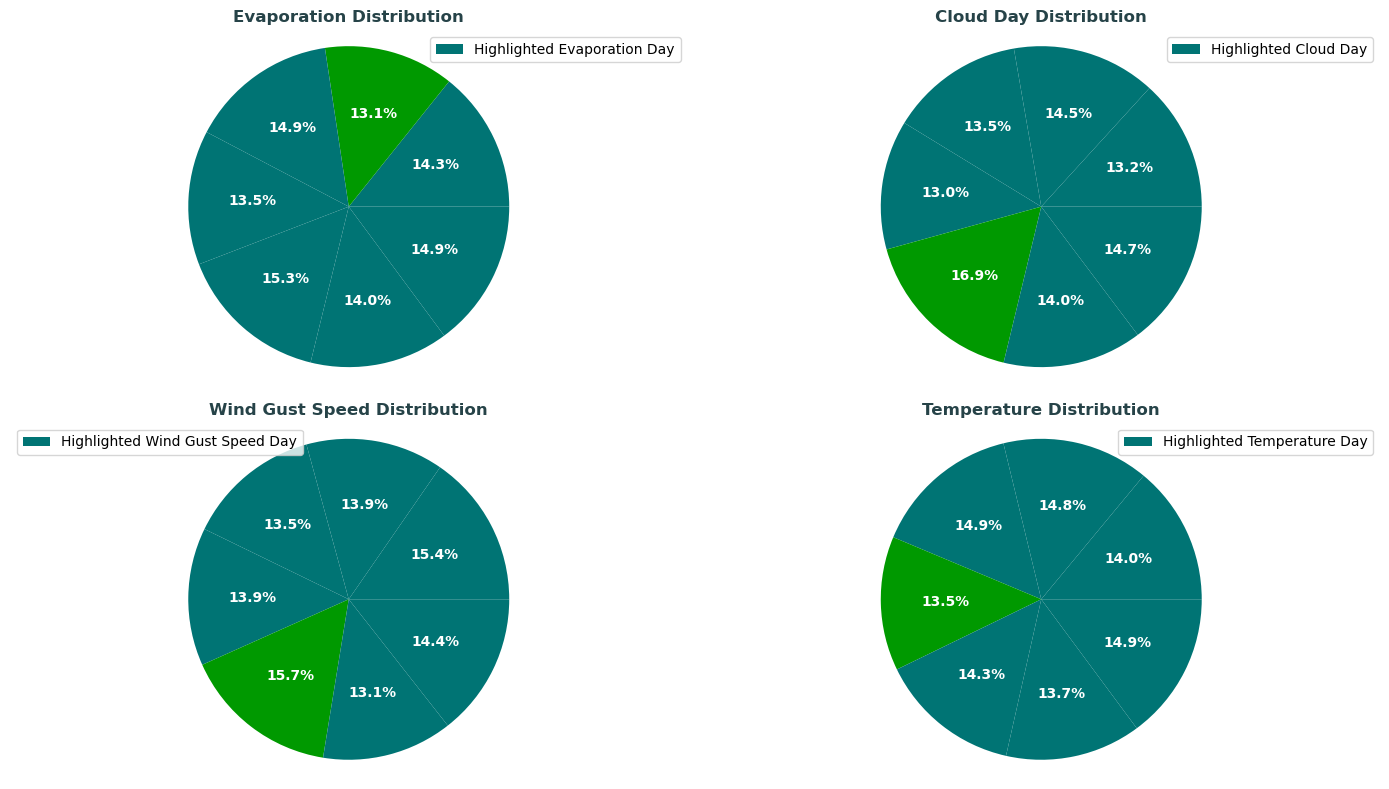

In [34]:

default_color = '#007474'  
highlight_color = '#009900'  

max_evaporation_day = Day['Evaporation'].idxmin()
max_cloud_day = Day['Cloud_Day'].idxmax()
max_wind_day = Day['WindGustSpeed'].idxmax()
min_temperature_day = Day['Temperature'].idxmin()

color_data = [highlight_color if day == max_evaporation_day else default_color for day in Day.index]
color_c = [highlight_color if day == max_cloud_day else default_color for day in Day.index]
color_w = [highlight_color if day == max_wind_day else default_color for day in Day.index]
color_T = [highlight_color if day == min_temperature_day else default_color for day in Day.index]

figure, axis = plt.subplots(2, 2, figsize=(14, 8))

axis[0][0].pie(
    Day['Evaporation'],
    labels=Day.index,
    autopct='%1.1f%%',
    colors=color_data,
     textprops={'color': 'white','fontweight':'bold'}
)
axis[0][0].set_title('Evaporation Distribution',size=10, fontsize=12, fontweight='bold', color='#264348')
axis[0][0].axis('equal')  

axis[0][1].pie(
    Day['Cloud_Day'],
    labels=Day.index,
    autopct='%1.1f%%',
    colors=color_c,textprops={'color': 'white','fontweight':'bold'}
)
axis[0][1].set_title('Cloud Day Distribution',size=10, fontsize=12, fontweight='bold', color='#264348') 
axis[0][1].axis('equal')

axis[1][0].pie(
    Day['WindGustSpeed'],
    labels=Day.index,
    autopct='%1.1f%%',
    colors=color_w,textprops={'color': 'white','fontweight':'bold'}
)
axis[1][0].set_title('Wind Gust Speed Distribution',size=10, fontsize=12, fontweight='bold', color='#264348')
axis[1][0].axis('equal')

axis[1][1].pie(
    Day['Temperature'],
    labels=Day.index,
    autopct='%1.1f%%',
    colors=color_T,textprops={'color': 'white','fontweight':'bold'}
)
axis[1][1].set_title('Temperature Distribution',size=10, fontsize=12, fontweight='bold', color='#264348')
axis[1][1].axis('equal')

axis[0][0].legend(['Highlighted Evaporation Day'], loc='best')
axis[0][1].legend(['Highlighted Cloud Day'], loc='best')
axis[1][0].legend(['Highlighted Wind Gust Speed Day'], loc='best')
axis[1][1].legend(['Highlighted Temperature Day'], loc='best')

plt.tight_layout()
plt.savefig('D:/3')

C:\Users\mostafa\AppData\Local\Temp\ipykernel_16148\2297613751.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0][0].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels
C:\Users\mostafa\AppData\Local\Temp\ipykernel_16148\2297613751.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0][1].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels
C:\Users\mostafa\AppData\Local\Temp\ipykernel_16148\2297613751.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1][0].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels
C:\Users\mostafa\AppData\Local\Temp\ipyk

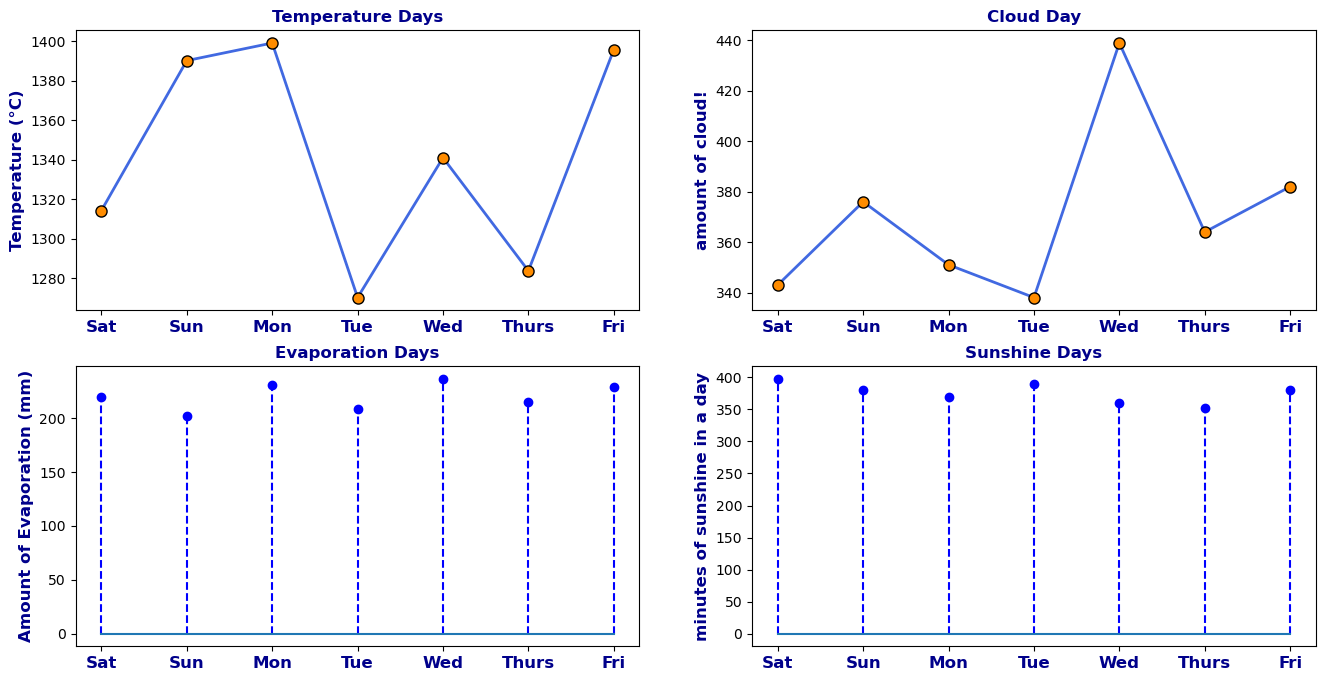

In [35]:
figure,axis=plt.subplots(2,2,figsize=(16,8))
axis[0][0].set_title('Temperature Days', fontsize=12, fontweight='bold', color='darkblue')
axis[0][0].set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='darkblue')
axis[0][0].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels
axis[0][1].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels
axis[1][0].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels
axis[1][1].set_xticklabels(Day.index,fontsize=12, fontweight='bold', color='darkblue')  # Replace [...] with your labels

axis[0][0].plot(Day['Temperature'],color='royalblue', linewidth=2, linestyle='-', marker='o', markersize=8, markerfacecolor='darkorange', markeredgecolor='black')
axis[0][1].plot(Day['Cloud_Day'], color='royalblue', linewidth=2, linestyle='-', marker='o', markersize=8, 
         markerfacecolor='darkorange', markeredgecolor='black')
axis[0][1].set_title('Cloud Day', fontsize=12, fontweight='bold', color='darkblue')
axis[0][1].set_ylabel('amount of cloud!', fontsize=12, fontweight='bold', color='darkblue') 
axis[1][0].set_ylabel('Amount of Evaporation (mm)', fontsize=12, fontweight='bold', color='darkblue') 
axis[1][0].set_title('Evaporation Days', fontsize=12, fontweight='bold', color='darkblue')
axis[1][0].stem(Day.index, Day['Evaporation'], 
                markerfmt='o', 
                basefmt='-', 
                linefmt='--b',  # Line format with color (e.g., blue dashed)
                )
axis[1][1].set_title('Sunshine Days', fontsize=12, fontweight='bold', color='darkblue')
axis[1][1].set_ylabel('minutes of sunshine in a day', fontsize=12, fontweight='bold', color='darkblue')
axis[1][1].stem(Day.index,Day['Sunshine'],markerfmt='o', 
                basefmt='-', 
                linefmt='--b',)
plt.savefig('D:/4')
